
# Marketing Campaign Effectiveness Analysis

## Introduction
This project analyzes a marketing campaign using data wrangling, exploratory data analysis (EDA), and A/B testing to assess customer response and the campaign's effectiveness.

### Objectives:
- **Understand customer demographics and spending behavior** through EDA.
- **Perform A/B testing** to evaluate the impact of marketing strategies.
- **Use statistical methods** (t-tests, chi-square tests, confidence intervals) to determine significance.

### Dataset Overview:
The dataset includes **2240 customers** with **29 attributes**, such as income, spending behavior, and response to different marketing efforts.


## Data Loading & Cleaning

In this section, I load the marketing campaign data, check for missing values, and perform initial data cleaning. I drop rows with missing income values and remove columns that are not relevant for our analysis. I also create new features, such as the customer's age and total spending, to enhance my analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('~/Downloads/marketing_campaign.csv', sep=';')

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
#Check which values are missing & how many
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Income    24
dtype: int64

In [7]:
#Remove rows w/ missing Income values
df = df.dropna(subset=['Income'])

In [8]:
#Drop unnecessary columns
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [9]:
#Create Age feature
df['Age'] = pd.Timestamp.now().year - df['Year_Birth']

In [10]:
#Create Total Spend feature
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [11]:
#Convert date column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## Exploratory Data Analysis

Here, I explore the data through visualizations. I examine the distribution of total spending and investigate relationships between spending and customer demographics (such as Age, Marital Status, and Education). These plots help understand the spread and variance in spending, which sets the stage for the subsequent statistical tests.

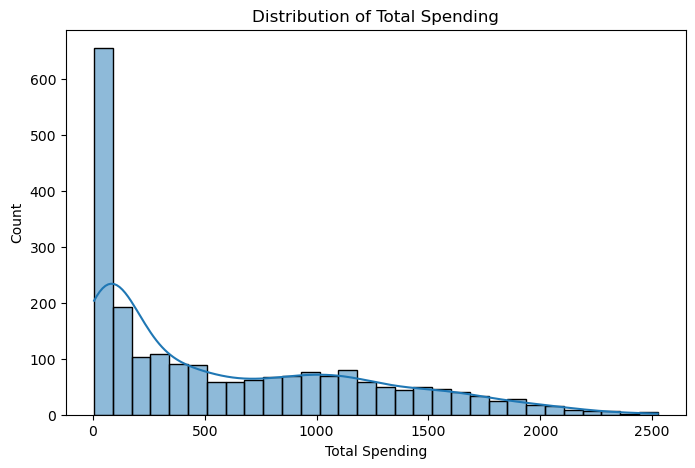

In [12]:
#Distribution of customer spending
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title("Distribution of Total Spending")
plt.xlabel('Total Spending')
plt.show()

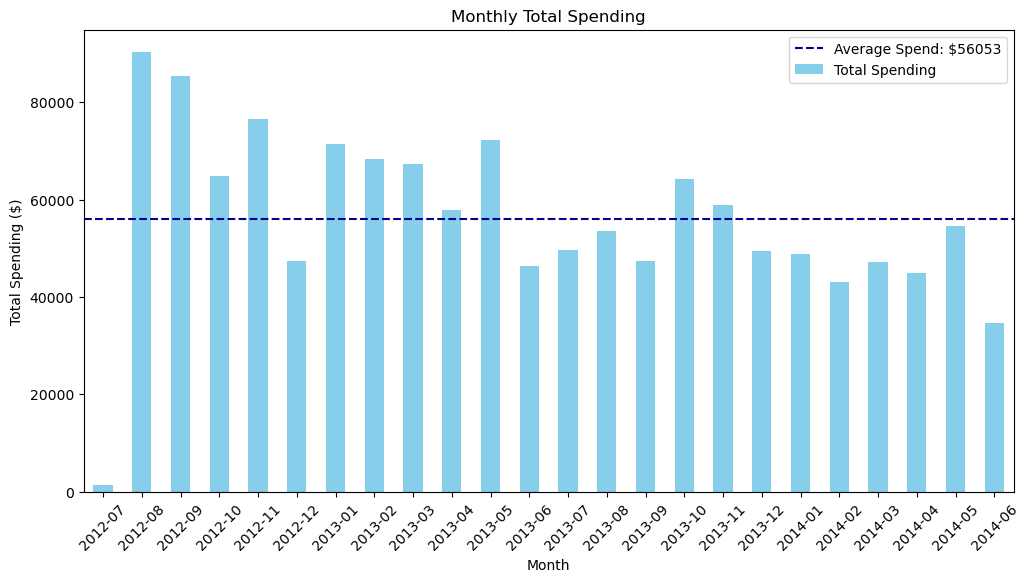

In [13]:
monthly_spending = df.groupby(df['Dt_Customer'].dt.to_period('M'))['Total_Spend'].sum()
monthly_spending.plot(kind='bar', figsize=(12, 6), color='skyblue', label="Total Spending")
plt.title('Monthly Total Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)

avg_spending = monthly_spending.mean()
plt.axhline(y=avg_spending, color='darkblue', linestyle='--', label=f'Average Spend: ${avg_spending:.0f}')
plt.legend()

plt.show()

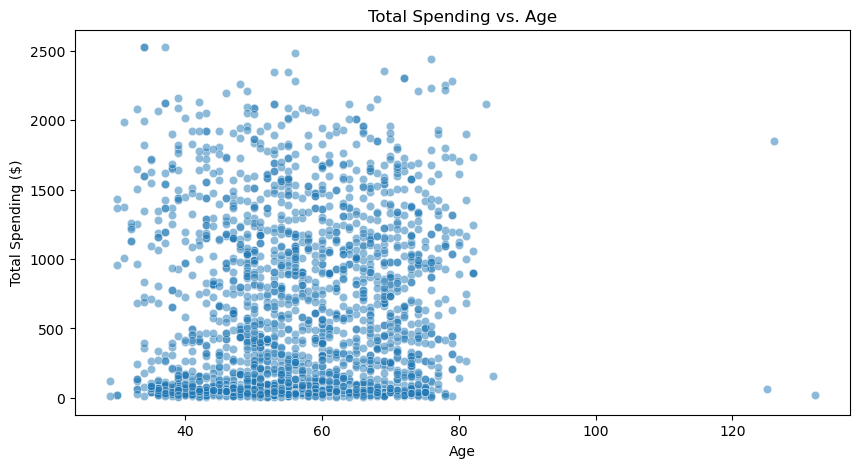

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Total_Spend', data=df, alpha=0.5)
plt.title("Total Spending vs. Age")
plt.xlabel("Age")
plt.ylabel("Total Spending ($)")
plt.show()

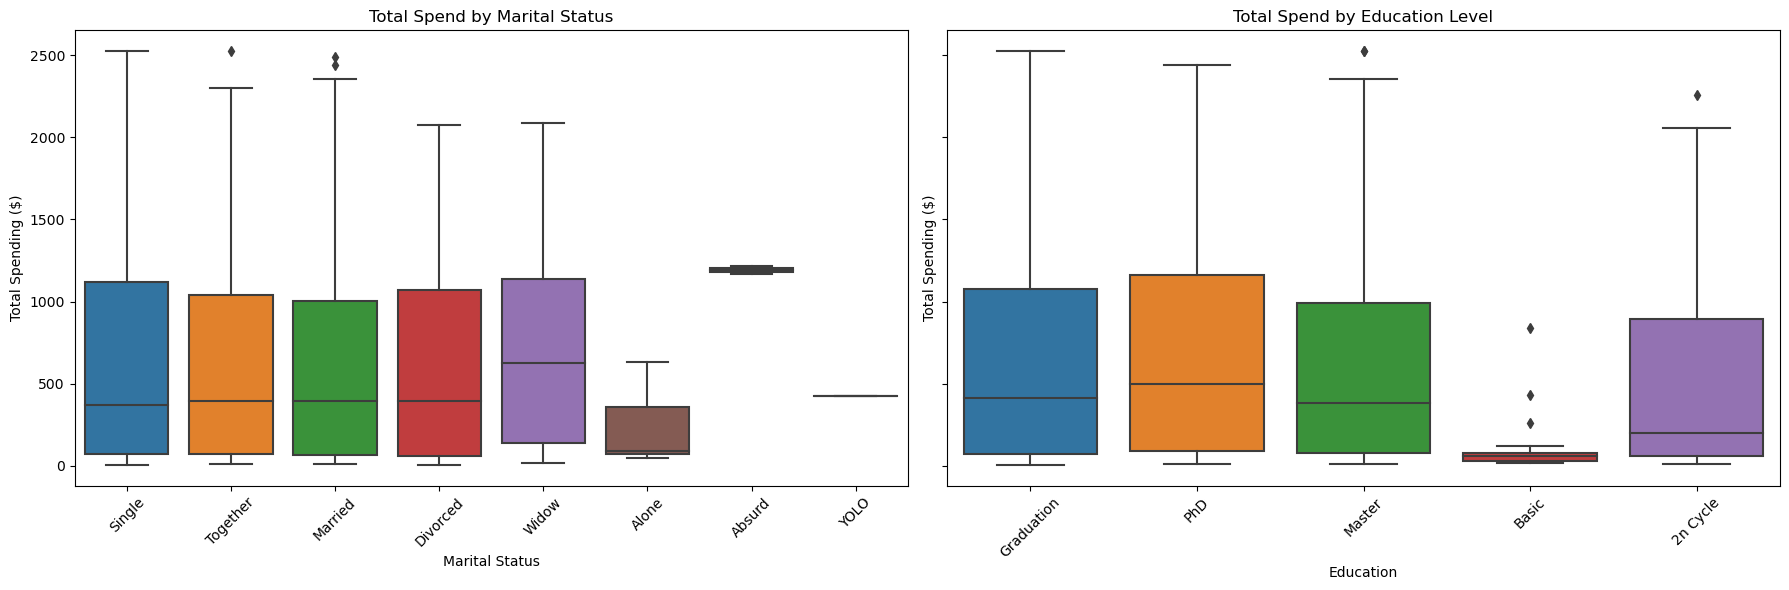

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

#Subplot 1: Total Spend by Marital Status
sns.boxplot(ax=axes[0], x='Marital_Status', y='Total_Spend', data=df)
axes[0].set_title("Total Spend by Marital Status")
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Total Spending ($)")
axes[0].tick_params(axis='x', rotation=45)

#Subplot 2: Total Spend by Education Level
sns.boxplot(ax=axes[1], x='Education', y='Total_Spend', data=df)
axes[1].set_title("Total Spend by Education Level")
axes[1].set_xlabel("Education")
axes[1].set_ylabel("Total Spending ($)")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

The visualization above suggest that neither age, marital status, or education level lead to major differences in total spending. However, to further assess this, I conduct two ANOVA (Analysis of Variance) tests below to see whether there are statistically significant differences between these categorical variables and total spending.

In [16]:
#Perform ANOVA for Marital Status
anova_marital = stats.f_oneway(
    df[df["Marital_Status"] == "Single"]["Total_Spend"],
    df[df["Marital_Status"] == "Married"]["Total_Spend"],
    df[df["Marital_Status"] == "Together"]["Total_Spend"],
    df[df["Marital_Status"] == "Divorced"]["Total_Spend"],
    df[df["Marital_Status"] == "Widow"]["Total_Spend"]
)

print(f"ANOVA for Marital Status: F-statistic = {anova_marital.statistic:.4f}, p-value = {anova_marital.pvalue:.4f}")

#Perform ANOVA for Education
anova_education = stats.f_oneway(
    df[df["Education"] == "Basic"]["Total_Spend"],
    df[df["Education"] == "Graduation"]["Total_Spend"],
    df[df["Education"] == "PhD"]["Total_Spend"],
    df[df["Education"] == "Master"]["Total_Spend"],
    df[df["Education"] == "2n Cycle"]["Total_Spend"]
)

print(f"ANOVA for Education Level: F-statistic = {anova_education.statistic:.4f}, p-value = {anova_education.pvalue:.4f}")


ANOVA for Marital Status: F-statistic = 0.9191, p-value = 0.4518
ANOVA for Education Level: F-statistic = 14.0731, p-value = 0.0000


For the marital status, since the p-value > 0.05, there is no statistically significant difference in total spending across different marital status groups. This means that marital status is not a major factor in explaining variations in spending behavior. However, since for educational levels the p-value < 0.05, there **is** a statistically significant difference in total spending across different education levels. This means that education level *does* influence spending. For further analysis, I utilize Tukey's HSD post-hoc test to determine which groups differ.

In [17]:
tukey_edu = pairwise_tukeyhsd(df["Total_Spend"], df["Education"])
print(tukey_edu)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1     group2    meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
  2n Cycle      Basic -413.1337 0.0001 -662.6224 -163.645   True
  2n Cycle Graduation  126.7564 0.0447    1.8379 251.6749   True
  2n Cycle     Master  114.8371 0.1836  -28.2856 257.9599  False
  2n Cycle        PhD  181.8039 0.0027   44.9265 318.6813   True
     Basic Graduation  539.8901    0.0  313.2119 766.5683   True
     Basic     Master  527.9708    0.0  290.7736  765.168   True
     Basic        PhD  594.9376    0.0  361.4556 828.4195   True
Graduation     Master  -11.9193 0.9974 -110.0138  86.1753  False
Graduation        PhD   55.0475 0.4381  -33.6872 143.7822  False
    Master        PhD   66.9668 0.4853  -45.9639 179.8975  False
----------------------------------------------------------------


The Tukey HSD test highlights pairwise differences in spending behavior between education groups. Key findings:

1. **Basic vs. Other Levels**:
   - Customers with "Basic" education spend **significantly more** than those with "Graduation," "Master," or "PhD."

2. **2n Cycle vs. Other Levels**:
   - Customers with "2n Cycle" education spend **significantly less** than those with "Basic" or "PhD."
   - They also spend **slightly more** than those with "Graduation."

**Business Implication**:  
- Focus marketing efforts on customers with **Basic** education, as they exhibit the highest spending.

## A/B Testing & Statistical Analysis

In this section, I compare customer groups (campaign responders vs. non-responders) using t-tests and chi-square tests. I compute effect sizes (Cohen's d) and confidence intervals to determine the practical significance of my findings. The statistical tests help validate whether the observed differences in income and total spending are statistically significant.

### T-Test Analysis

In [18]:
df['Campaign_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0
df['Campaign_Accepted'] = df['Campaign_Accepted'].astype(int)

In [19]:
treated_recency = df[df['Campaign_Accepted'] == 1]['Recency']
control_recency = df[df['Campaign_Accepted'] == 0]['Recency']

t_stat_recency, p_value_recency = stats.ttest_ind(treated_recency, control_recency, equal_var=False)
print(f"T-test for Recency: t-statistic = {t_stat_recency:.4f}, p-value = {p_value_recency:.4f}")

T-test for Recency: t-statistic = -0.7855, p-value = 0.4324


In [20]:
treated_spend = df[df['Campaign_Accepted'] == 1]['Total_Spend']
control_spend = df[df['Campaign_Accepted'] == 0]['Total_Spend']

t_stat_spend, p_value_spend = stats.ttest_ind(treated_spend, control_spend, equal_var=False)
print(f"T-test for Total Spend: t-statistic = {t_stat_spend:.4f}, p-value = {p_value_spend:.4f}")

T-test for Total Spend: t-statistic = 18.2166, p-value = 0.0000


In [21]:
treated_income = df[df['Campaign_Accepted'] == 1]['Income']
control_income = df[df['Campaign_Accepted'] == 0]['Income']
t_stat_income, p_value_income = stats.ttest_ind(treated_income, control_income, equal_var=False)
print(f"T-test for Income: t-statistic = {t_stat_income:.4f}, p-value = {p_value_income:.4f}")

T-test for Income: t-statistic = 14.6201, p-value = 0.0000


In [22]:
#Compare Age between campaign respondents and non-respondents
treated_age = df[df['Response'] == 1]['Age']
control_age = df[df['Response'] == 0]['Age']
t_stat_age, p_value_age = stats.ttest_ind(treated_age, control_age, equal_var=False)
print(f"T-test for Age: t-statistic = {t_stat_age:.4f}, p-value = {p_value_age:.4f}")

T-test for Age: t-statistic = -1.0891, p-value = 0.2767


Based on these results, I can conclude that neither the recency (number of days since the last purchase), nor the age of the individual are statistically significant variables when it comes to accepting a given campaign. The individual's income and total spending are the only variables that are predictive in whether they accepted a campaign or not.

### Chi-Square Test

In [23]:
contingency_education = pd.crosstab(df['Campaign_Accepted'], df['Education'])
chi2_edu, p_edu, _, _ = stats.chi2_contingency(contingency_education)
print(f"Chi-square for Education Level: chi2 = {chi2_edu:.4f}, p-value = {p_edu:.4f}")

Chi-square for Education Level: chi2 = 6.3394, p-value = 0.1752


In [24]:
contingency_marital = pd.crosstab(df['Campaign_Accepted'], df['Marital_Status'])
chi2_marital, p_marital, _, _ = stats.chi2_contingency(contingency_marital)
print(f"Chi-square for Marital Status: chi2 = {chi2_marital:.4f}, p-value = {p_marital:.4f}")

Chi-square for Marital Status: chi2 = 2.6122, p-value = 0.9184


Based on these results, I can conclude that neither education level, nor marital status, are statistically significant variables when it comes to accepting a given campaign. Since income and total spending were the only statistically significant variables, I explore them further with additional methods below.

### Further Analysis (Effect Sizes & Confidence Intervals)

In [25]:
mean_diff = treated_spend.mean() - control_spend.mean()
pooled_std = np.sqrt(((treated_spend.std()**2) + (control_spend.std()**2)) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d for Total Spending: {cohen_d:.4f}")

Cohen's d for Total Spending: 1.0266


This indicates a **large effect size**. The marketing campaign had a strong impact on the total spending behavior of responders compared to non-responders.

In [26]:
#Confidence Interval for Total Spending Difference
delta = stats.norm.ppf(0.975) * pooled_std / np.sqrt(len(treated_spend) + len(control_spend))
ci_lower = mean_diff - delta
ci_upper = mean_diff + delta
print(f"95% Confidence Interval for Total Spending Difference: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for Total Spending Difference: (588.90, 638.68)


The result from the confidence interval suggest that we are 95% confident the true difference in total spending between the two groups (campaign responders vs. non-responders) is between **588.90 and 638.68 USD**.
Since the interval does not include zero, this indicates a statistically significant difference in spending between the groups. The campaign likely had a positive impact on spending.

In [27]:
mean_diff = treated_income.mean() - control_income.mean()
pooled_std = np.sqrt(((treated_income.std()**2) + (control_income.std()**2)) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d for Income: {cohen_d:.4f}")

Cohen's d for Income: 0.7167


This indicates a **medium-to-large effect size**. There is a noticeable difference in income between responders and non-responders, though not as strong as the difference in spending.

In [28]:
#Confidence Interval for Income Difference
delta = stats.norm.ppf(0.975) * pooled_std / np.sqrt(len(treated_income) + len(control_income))
ci_lower = mean_diff - delta
ci_upper = mean_diff + delta
print(f"95% Confidence Interval for Income Difference: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval for Income Difference: (15453.58, 17359.70)


This confidence interval means we are 95% confident the true difference in income between the two groups lies between **15,453.58 and 17,359.70 USD**.

## Conclusion & Key Insights
This analysis set out to evaluate the effectiveness of a marketing campaign using customer demographic and spending data. The key findings are as follows:

- **Customer Spending Behavior:**
The overall distribution of customer spending shows a wide range, with campaign responders spending significantly more than non-responders. The t-test for total spending yielded a very low p-value (< 0.0001) and a large effect size (Cohen’s d > 1), indicating that the campaign is associated with a strong increase in customer spending.

- **Demographic Factors:**
Statistical tests revealed that factors such as age, number of days since the last purchase, marital status, and education level are not statistically significant predictors of campaign response. In contrast, income is a significant factor. This suggests that higher-income customers are more likely to engage with the campaign.

- **Campaign Impact & Business Implications:**
The evidence indicates that the campaign effectively drove higher spending among its responders. Based on these insights, future marketing strategies should target higher-income and higher-spending customers to maximize ROI. Further segmentation within these groups could lead to even more tailored and effective campaigns.

In summary, this analysis demonstrates that while several customer demographics are not significant predictors, income and total spending behavior are strong indicators of campaign success. Focusing marketing efforts on these segments can help optimize future campaign performance.
